In [1]:
%matplotlib inline

from __future__ import print_function
import matplotlib.pyplot as plt
import pyart
import numpy as np
from scipy import ndimage, signal
import time
from matplotlib.ticker import Formatter

sweep  = 0
x_lims = [0, 20]
y_lims = [0, 4]
v_min  = -15
v_max  = 15
fig_sz = [20, 10]
c_lbl  = 'Velocity (ms^-^1)'
p_data = 'velocity'
root_path = '/run/media/meso/DATA/phd/obs/radar/CP2/mdv/s_band/rhi/'
nyq       = 50


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119 


In [6]:
def plot_rhi(fn,subpl,c_flag,x_label,y_label):
    # read file
    # filename = '/media/meso/DATA/phd/obs/radar/CP2/mdv/s_band/rhi/20141106/031202.mdv'
    radar = pyart.io.read_mdv(fn)
    display = pyart.graph.RadarDisplay(radar)
    # plot velocity
    ax = fig.add_subplot(subpl)   
    
    gatefilter = pyart.correct.GateFilter(radar)
    gatefilter.exclude_below(p_data,v_min)
    gatefilter.exclude_above(p_data,v_max)
    corr_vel = pyart.correct.dealias_region_based(
        radar, vel_field='velocity', keep_original=False, 
        gatefilter = gatefilter, nyquist_vel=nyq, centered = True)
    radar.add_field('corrected_velocity', corr_vel, replace_existing = True)
    
    print(radar.azimuth['data'])  
    
#    smooth_corr_vel = np.zeros_like(corr_vel)
#    for i in range(smooth_corr_vel.shape[0]):
#        smooth_corr_vel[i,:] = \
#        pyart.correct.phase_proc.smooth_and_trim(corr_vel[i,:], 8)
#        
#    radar.add_field_like('corrected_velocity', 
#            'smooth_corrected_velocity', 
#            smooth_corr_vel, replace_existing = True)
    
    
#    display.plot_rhi('corrected_velocity_knots', sweep=sweep, 
#                     vmin=v_min, vmax=v_max, fig=fig, ax=ax,
#                     colorbar_flag=c_flag, cmap = pyart.graph.cm.BuDRd18,
#                     title = '', axislabels = (x_label,y_label))
#    display.set_limits(xlim=x_lims, ylim=y_lims)

    display.plot_rhi('corrected_velocity', sweep=sweep, 
                     vmin=v_min, vmax=v_max, fig=fig, ax=ax,
                     colorbar_flag=c_flag, cmap = pyart.graph.cm.BuDRd18,
                     title = '', axislabels = (x_label,y_label))
    display.set_limits(xlim=x_lims, ylim=y_lims)    
    
    plt.yticks([1,2,3])
    plt.xticks([0,5,10,15,20])
        
    ax.xaxis.grid(ls='-')
    ax.yaxis.grid(ls='-')
    #to do:
    
    #figure colorbar on rhs for all subplots
    #generate colormap for -10 to 15 centred on 0
    #major yticks (with numbers) at 2 and 4
    #y grid lines at 1,2,3,4
    #x axis is good!    

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(20)

[ 70.12000275  70.12000275  70.12000275  70.12000275  70.12000275
  70.12000275  70.12000275  70.12000275  70.12000275  70.12000275
  70.12000275  70.12000275  70.12000275  70.12000275  70.12000275
  70.12000275  70.12000275  70.12000275  70.12000275  70.12000275
  70.12000275  70.12000275  70.12000275  70.12000275  70.12000275
  70.12000275  70.12000275  70.12000275  70.12000275  70.12000275
  70.12000275  70.12000275  70.12000275  70.12000275  70.12000275
  70.12000275  70.12000275  70.12000275  70.12000275  70.12000275
  70.12000275  70.12000275  70.12000275  70.12000275  70.12000275
  70.12000275  70.12000275  70.12000275  70.12000275  70.12000275
  70.12000275  70.12000275  70.12000275  70.12000275  70.12000275
  70.12000275  70.12000275  70.12000275  70.12000275  70.12000275
  70.12000275  70.12000275  70.12000275  70.12000275  70.12000275
  70.12000275  70.12000275  70.12000275  70.12000275  70.12000275
  70.12000275  70.12000275  70.12000275  70.12000275  70.12000275
  70.12000

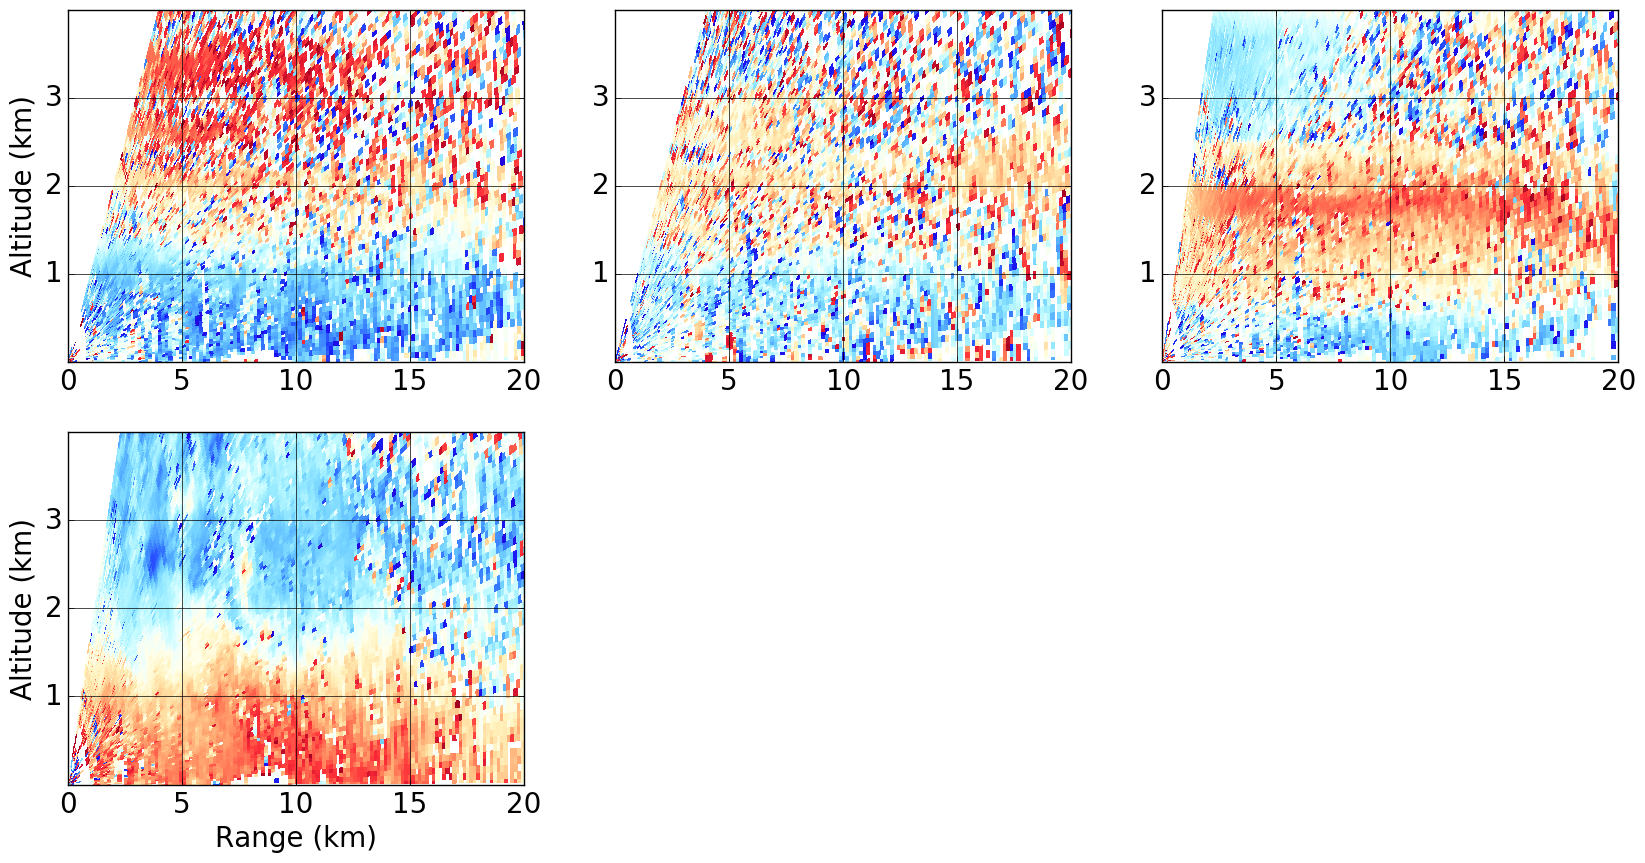

In [11]:
fig = plt.figure(figsize=fig_sz)

fn = '20141119/033002.mdv'
plot_rhi(root_path + fn,231,0,'','Altitude (km)')
fn = '20141126/033002.mdv'
plot_rhi(root_path + fn,232,0,'','')
fn = '20141208/032935.mdv'
plot_rhi(root_path + fn,233,0,'','')
fn = '20150119/033559.mdv'
plot_rhi(root_path + fn,234,0,'Range (km)','Altitude (km)')
#fn = '20150119/030045.mdv'
#plot_rhi(root_path + fn,326)

plt.savefig('CP2_seabreezes.png', dpi=200)

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	units: meters
	long_name: Altitude
	standard_name: Altitude
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float64 and shape: (426,)>
	comment: Azimuth of antenna relative to true north
	long_name: azimuth_angle_from_true_north
	standard_name: beam_azimuth_angle
	units: degrees
	axis: radial_azimuth_coordinate
elevation:
	data: <ndarray of type: float64 and shape: (426,)>
	comment: Elevation of antenna relative to the horizontal plane
	long_name: elevation_angle_from_horizontal_plane
	standard_name: beam_elevation_angle
	units: degrees
	axis: radial_elevation_coordinate
fields:
	differential_phase:
		data: <ndarray of type: float32 and shape: (426, 950)>
		long_name: Differential phase (PhiDP)
		valid_min: -180.0
		_FillValue: -9999.0
		units: degrees
		valid_max: 180.0
		standard_name: differential_phase_hv
		coordinates: elevation azimuth range
	cross_correlation_ratio:
		data: <

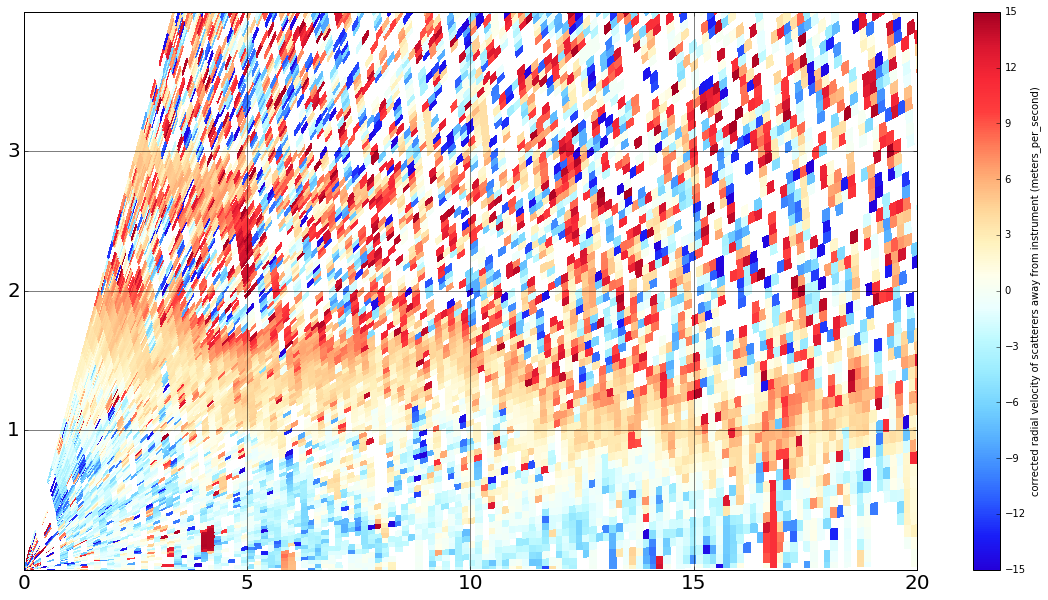

In [5]:
fig = plt.figure(figsize=fig_sz)
fn = '20141218/030001.mdv'
plot_rhi(root_path + fn,111,1,'','')
plt.savefig('tmp/CP2_seabreezes_cmap.png', dpi=200)